In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import datetime

In [5]:
from pymongo import MongoClient

In [96]:
import matplotlib.pyplot as plt

In [91]:
import seaborn as sns

In [46]:
%matplotlib inline

In [6]:
mongo_client = MongoClient('18.228.159.69', 27017)
mongo_db = mongo_client['projeto_in242']
mongo_collection = mongo_db['in242']

In [7]:
dados = list(mongo_collection.find())
df = pd.DataFrame(dados)

In [8]:
df.head()

,_id,temperatura,data_coleta,data
0,5db096ce8fb6f06a1273e1b9,23.911358,2019-10-23 15:07:10.226,NaN
1,5db096cf8fb6f06a1273e1ba,24.103100,2019-10-23 15:07:11.227,NaN
2,5db096d08fb6f06a1273e1bb,23.023379,2019-10-23 15:07:12.228,NaN
3,5db096d18fb6f06a1273e1bc,29.949198,2019-10-23 15:07:13.230,NaN
4,5db096d28fb6f06a1273e1bd,27.933929,2019-10-23 15:07:14.229,NaN


In [9]:
df.shape

(48243, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48243 entries, 0 to 48242
Data columns (total 4 columns):
_id            48243 non-null object
temperatura    48243 non-null float64
data_coleta    48243 non-null datetime64[ns]
data           41881 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.5+ MB


In [11]:
df.count()

_id            48243
temperatura    48243
data_coleta    48243
data           41881
dtype: int64

In [298]:
df.to_csv('Projeto_IN242.csv')

In [ ]:
#organizando as informações

In [12]:
df.drop(['_id', 'data'], axis=1, inplace=True)

In [14]:
df = df[['data_coleta', 'temperatura']]

In [15]:
df.head()

,data_coleta,temperatura
0,2019-10-23 15:07:10.226,23.911358
1,2019-10-23 15:07:11.227,24.103100
2,2019-10-23 15:07:12.228,23.023379
3,2019-10-23 15:07:13.230,29.949198
4,2019-10-23 15:07:14.229,27.933929


In [23]:
df['temperatura'].agg(['min', 'max', 'mean'])

min     15.001066
max     29.999754
mean    22.525637
Name: temperatura, dtype: float64

In [24]:
#analise alarme de temperatura

In [25]:
def analise_temperatura(temperatura):
    if 20 < temperatura <= 25:
        return False
    else:
        return True
        

In [27]:
df['alarm'] = df['temperatura'].apply(analise_temperatura)

/home/aluno/projeto_in242/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df.head()

,data_coleta,temperatura,alarm
0,2019-10-23 15:07:10.226,23.911358,False
1,2019-10-23 15:07:11.227,24.103100,False
2,2019-10-23 15:07:12.228,23.023379,False
3,2019-10-23 15:07:13.230,29.949198,True
4,2019-10-23 15:07:14.229,27.933929,True


In [32]:
df['alarm'].value_counts()

True     32028
False    16215
Name: alarm, dtype: int64

In [33]:
df_day = df.set_index('data_coleta').groupby(pd.Grouper(freq='D')).mean()

In [42]:
df_day

,temperatura,alarm
data_coleta,,
2019-10-23,22.447605,0.672744
2019-10-24,NaN,NaN
2019-10-25,NaN,NaN
2019-10-26,NaN,NaN
2019-10-27,NaN,NaN
2019-10-28,22.562178,0.663585
2019-10-29,22.528065,0.662147


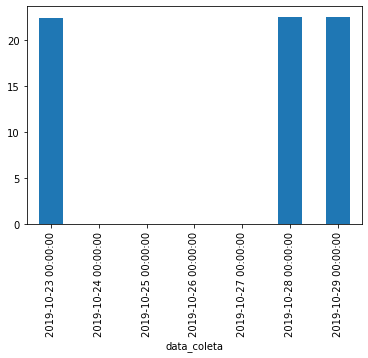

In [49]:
#Media de temperatura diaria
df_day['temperatura'].plot.bar()

In [50]:
#Analise dos dados - dia 29/10

In [154]:
df_20191029 = df[(df['data_coleta'] > '2019-10-29 00:00:00') & (df['data_coleta'] < '2019-10-30 00:00:00')]

In [155]:
df_20191029.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30309 entries, 17934 to 48242
Data columns (total 3 columns):
data_coleta    30309 non-null datetime64[ns]
temperatura    30309 non-null float64
alarm          30309 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1)
memory usage: 740.0 KB


In [157]:
# menor e maior valor e media de temperatura no dia 29/10
df_20191029['temperatura'].agg(['min', 'max', 'mean'])

min     15.001227
max     29.999754
mean    22.528065
Name: temperatura, dtype: float64

In [160]:
df_20191029['temperatura'].describe()

count    30309.000000
mean        22.528065
std          4.321400
min         15.001227
25%         18.819307
50%         22.562302
75%         26.270853
max         29.999754
Name: temperatura, dtype: float64

In [161]:
#contagem de alarmes no dia 29/10
df_20191029.groupby(['alarm']).count()

,data_coleta,temperatura
alarm,,
False,10240,10240
True,20069,20069


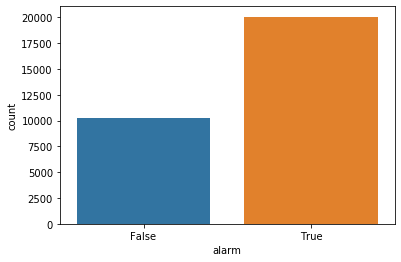

In [162]:
sns.countplot(x='alarm', data=df_20191029)

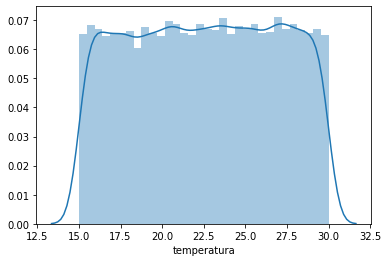

In [163]:
#Distribuição dos valores de temperatura no dia 29/10
sns.distplot(df_20191029['temperatura'])

In [164]:
#Media de temperatura por hora no dia 29/10
df_20191029_hora = df_20191028.set_index('data_coleta').groupby(pd.Grouper(freq='H')).mean()

In [165]:
df_20191029_hora

,temperatura,alarm
data_coleta,,
2019-10-29 00:00:00,22.571293,0.671696
2019-10-29 01:00:00,22.562517,0.669078
2019-10-29 02:00:00,22.542012,0.664256
2019-10-29 03:00:00,22.381356,0.665057
2019-10-29 04:00:00,22.561546,0.668495
2019-10-29 05:00:00,22.524773,0.650392
2019-10-29 06:00:00,22.617364,0.662636
2019-10-29 07:00:00,22.537353,0.667271
2019-10-29 08:00:00,22.416776,0.665051


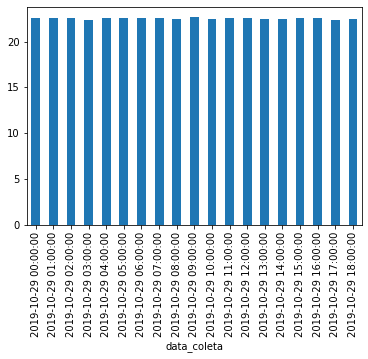

In [166]:
#plot media de temperatura por hora no dia 29/10
df_20191029_hora['temperatura'].plot.bar()

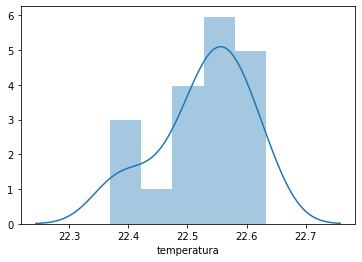

In [168]:
#Distribuição da media de temperatura por hora no dia 29/10
sns.distplot(df_20191029_hora['temperatura'])

In [175]:
#Analise da hora com maior media de temperatura no dia 29/10
df_20191029_09h = df[(df['data_coleta'] >= '2019-10-29 09:00:00') & (df['data_coleta'] < '2019-10-29 10:00:00')]

In [176]:
df_20191029_09h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 32827 to 34442
Data columns (total 3 columns):
data_coleta    1616 non-null datetime64[ns]
temperatura    1616 non-null float64
alarm          1616 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [177]:
df_20191029_09h

,data_coleta,temperatura,alarm
32827,2019-10-29 09:00:00.359,23.844437,False
32828,2019-10-29 09:00:02.540,17.590522,True
32829,2019-10-29 09:00:04.697,28.716728,True
32830,2019-10-29 09:00:06.848,23.146157,False
32831,2019-10-29 09:00:09.100,23.125261,False
...,...,...,...
34438,2019-10-29 09:59:48.981,24.603583,False
34439,2019-10-29 09:59:51.748,21.059959,False
34440,2019-10-29 09:59:53.909,18.019971,True
34441,2019-10-29 09:59:56.060,18.838526,True


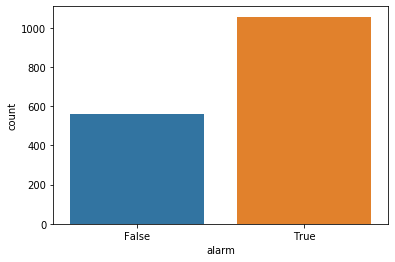

In [178]:
#Contagem de alarmes
sns.countplot(x='alarm', data=df_20191029_09h)

In [179]:
df_20191029_09h.groupby(['alarm'])['temperatura'].mean()

alarm
False    22.515192
True     22.695874
Name: temperatura, dtype: float64

In [180]:
#Analise da media de temperatura por minuto - 29/10 das 09:00 as 09:59
media_min = df_20191029_09h.set_index('data_coleta').resample('min')['temperatura'].mean()

In [181]:
media_min

data_coleta
2019-10-29 09:00:00    22.854292
2019-10-29 09:01:00    21.916119
2019-10-29 09:02:00    22.213742
2019-10-29 09:03:00    22.915318
2019-10-29 09:04:00    21.237829
2019-10-29 09:05:00    22.188150
2019-10-29 09:06:00    23.614968
2019-10-29 09:07:00    23.070620
2019-10-29 09:08:00    23.493829
2019-10-29 09:09:00    22.937302
2019-10-29 09:10:00    22.204891
2019-10-29 09:11:00    22.158074
2019-10-29 09:12:00    22.816639
2019-10-29 09:13:00    22.991204
2019-10-29 09:14:00    22.987503
2019-10-29 09:15:00    22.513935
2019-10-29 09:16:00    21.820252
2019-10-29 09:17:00    23.667693
2019-10-29 09:18:00    22.498597
2019-10-29 09:19:00    23.481277
2019-10-29 09:20:00    20.845398
2019-10-29 09:21:00    22.942935
2019-10-29 09:22:00    23.215626
2019-10-29 09:23:00    23.252969
2019-10-29 09:24:00    22.846685
2019-10-29 09:25:00    23.992328
2019-10-29 09:26:00    23.231892
2019-10-29 09:27:00    24.034798
2019-10-29 09:28:00    22.574144
2019-10-29 09:29:00    23.12849

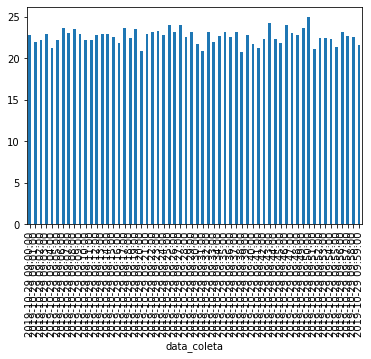

In [182]:
media_min.plot.bar()

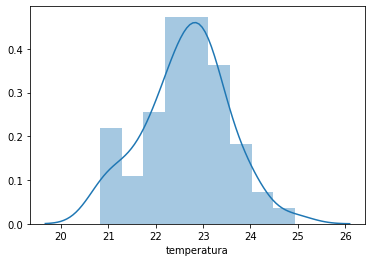

In [183]:
#distribuição da média de temeratura por minuto
sns.distplot(media_min)

In [251]:
#Analise de alarmes por minuto - 29/10 das 09:00 as 09:59
alarm_min = df_20191029_09h.set_index('data_coleta').resample('min')['alarm'].value_counts()

In [252]:
df_alarm_min = pd.DataFrame(data = alarm_min)

In [253]:
df_alarm_min = df_alarm_min.rename(columns={'alarm': 'count'})

In [255]:
df_alarm_min = df_alarm_min.pivot_table(index='data_coleta', values='count', columns='alarm')

In [256]:
df_alarm_min

alarm,False,True
data_coleta,,
2019-10-29 09:00:00,14,13
2019-10-29 09:01:00,13,15
2019-10-29 09:02:00,5,22
2019-10-29 09:03:00,6,22
2019-10-29 09:04:00,6,21
2019-10-29 09:05:00,10,18
2019-10-29 09:06:00,11,16
2019-10-29 09:07:00,8,20
2019-10-29 09:08:00,6,21


In [ ]:
#Analise de valores dia 29/10

In [291]:
df_20191029_09h.head()

,data_coleta,temperatura,alarm
32827,2019-10-29 09:00:00.359,23.844437,False
32828,2019-10-29 09:00:02.540,17.590522,True
32829,2019-10-29 09:00:04.697,28.716728,True
32830,2019-10-29 09:00:06.848,23.146157,False
32831,2019-10-29 09:00:09.100,23.125261,False


In [294]:
#Horario que registrou a maior temperatura
df_20191029_09h.loc[df_20191029_09h['temperatura'].idxmax()]

data_coleta    2019-10-29 09:24:57.902000
temperatura                       29.9762
alarm                                True
Name: 33508, dtype: object

In [295]:
#Horario  que registrou a menor temperatura
df_20191029_09h.loc[df_20191029_09h['temperatura'].idxmin()]

data_coleta    2019-10-29 09:39:43.728000
temperatura                       15.0024
alarm                                True
Name: 33909, dtype: object

In [296]:
#Horarios com maiores temperaturas
df_20191029_09h.sort_values('temperatura', ascending=False)[:5]

,data_coleta,temperatura,alarm
33508,2019-10-29 09:24:57.902,29.976194,True
32882,2019-10-29 09:02:01.908,29.967480,True
33182,2019-10-29 09:12:56.800,29.967286,True
34103,2019-10-29 09:46:53.903,29.958952,True
33567,2019-10-29 09:27:06.372,29.953793,True


In [297]:
#Horarios com maiores temperaturas
df_20191029_09h.sort_values('temperatura')[:5]

,data_coleta,temperatura,alarm
33909,2019-10-29 09:39:43.728,15.002411,True
33244,2019-10-29 09:15:13.747,15.006389,True
34141,2019-10-29 09:48:16.543,15.006523,True
33415,2019-10-29 09:21:34.960,15.019977,True
32936,2019-10-29 09:03:59.944,15.040491,True
